<a href="https://colab.research.google.com/github/andreaaraldo/machine-learning-for-networks/blob/master/9x.ml_highspeed_networks/Training%20and%20testing%20an%20MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

from livelossplot import PlotLosses

from typing import List

In [0]:
# Read csv for single-label dataset
df_h = pd.read_csv('highdataset.csv')
df_l = pd.read_csv('lowdataset.csv')

# Read the full dataset
#full_df = pd.concat([df_h, df_l], ignore_index=True)
full_df = pd.read_csv('fulldataset.csv')

data = full_df.to_numpy()
print (data)

[[1.00049514e+00 1.03077728e+08 1.23124322e+09 ... 2.58867891e+09
  1.00033176e+03 2.00000000e+00]
 [2.00077842e+00 1.03101759e+08 1.23279932e+09 ... 2.58855446e+09
  1.00027918e+03 2.00000000e+00]
 [3.00103663e+00 1.02770344e+08 1.23782341e+09 ... 2.58852670e+09
  1.00023441e+03 2.00000000e+00]
 ...
 [2.70220397e+01 5.47615400e+06 1.94312134e+09 ... 2.58890188e+09
  1.00023598e+03 0.00000000e+00]
 [2.80222923e+01 5.48787400e+06 1.94338561e+09 ... 2.58887486e+09
  1.00023823e+03 0.00000000e+00]
 [2.90225439e+01 5.49727500e+06 1.94272972e+09 ... 2.58887145e+09
  1.00022864e+03 0.00000000e+00]]


In [0]:
def train_validation_test_splits(data, train_size, validation_size):
    assert(train_size + validation_size < 1.0)
    # shuffling of the dataset
    np.random.shuffle(data)
    # extract the training portion
    n = int(train_size * len(data))
    train, rest = data[:n,:], data[n:,:]
    # from the remaining examples, we extract the validation and test portions
    n = int(validation_size * len(data))
    validation, test = rest[:n,:], rest[n:,:]
    return train, validation, test

train, validation, test = train_validation_test_splits(data, 0.8, 0.1)

print('The number of examples in the original dataset is ' + str(data.shape[0]))

print('The training-set has ' + str(train.shape[0]) + ' examples')
print('The validation-set has ' + str(validation.shape[0]) + ' exampels')
print('The test-set has ' + str(test.shape[0]) + ' examples')
print('The shape of train is ' + str(train.shape)) 

The number of examples in the original dataset is 2610
The training-set has 2088 examples
The validation-set has 261 exampels
The test-set has 261 examples
The shape of train is (2088, 33)


In [0]:
train_x, train_y = np.hsplit(train, [train.shape[1] - 1])
train_y = train_y.reshape(-1).astype(int)

validation_x, validation_y = np.hsplit(validation, [validation.shape[1] - 1])
validation_y = validation_y.reshape(-1).astype(int)

test_x, test_y = np.hsplit(test, [test.shape[1] - 1])
test_y = test_y.reshape(-1).astype(int)

In [0]:
min = train_x.min(axis=0)
max = train_x.max(axis=0)

train_x = (train_x - min)/(max - min)
validation_x = (validation_x - min)/(max - min)
test_x = (test_x - min)/(max - min)

In [0]:
class MLP(nn.Module):
    
    def __init__(self, input_size:int=10, hidden:List[int]=[10, 20, 30], output_size:int = 2):
        super(MLP, self).__init__()
        #Your definition here
        
    def forward(self, x):
        #Your forward here
        y = F.softmax(y)
        return y
        
        

In [0]:
model = MLP(a, [b], c)     # Where a is the number of features, and c is the number of classes
model = model.double()
model.parameters()

[10, 3]


<generator object Module.parameters at 0x7f2fb50abd60>

In [0]:
criterion = nn.CrossEntropyLoss()

# Your optimizer here
#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0)
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [0]:
batch_size = 32

train_dataset = TensorDataset(
    torch.from_numpy(train_x).double(), 
    torch.from_numpy(train_y))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

validation_dataset = TensorDataset(
    torch.from_numpy(validation_x).double(), 
    torch.from_numpy(validation_y))
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)


test_dataset = TensorDataset(
    torch.from_numpy(test_x).double(), 
    torch.from_numpy(test_y))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [0]:
liveloss = PlotLosses()

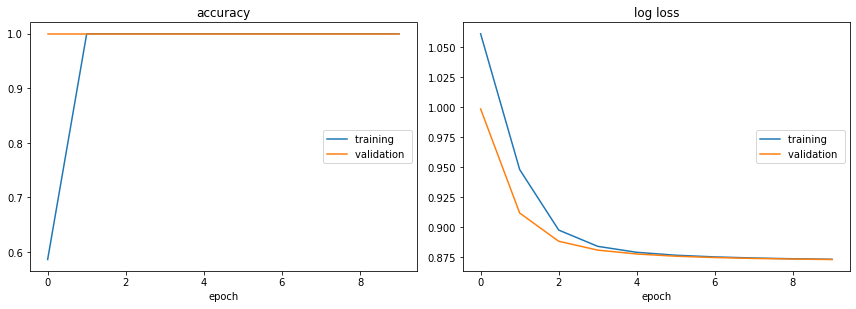

accuracy
	training         	 (min:    0.586, max:    1.000, cur:    1.000)
	validation       	 (min:    0.996, max:    1.000, cur:    1.000)
log loss
	training         	 (min:    0.871, max:    1.061, cur:    0.873)
	validation       	 (min:    0.871, max:    0.999, cur:    0.873)


In [0]:
epochs = 10

data_loader = {'train':train_loader, 'validation':validation_loader}

for epoch in range(epochs):  # loop over the dataset multiple times
    
    ####
    # Your training here
    ####
    
    
    epoch_loss = running_loss / len(data_loader[phase].dataset)
    logs[prefix + 'log loss'] = epoch_loss.item()
    epoch_acc = running_corrects.float() / len(data_loader[phase].dataset)
    logs[prefix + 'accuracy'] = epoch_acc.item()
    
    liveloss.update(logs)
    liveloss.draw()

In [0]:
# Your evaluation here

model.eval()

running_loss = 0.0
running_corrects = 0
for i, batch in enumerate(test_loader):
    x, y = batch
    y_pred = model(x)
    _, y_pred = torch.max(y_pred.detach(), 1)
    running_corrects += torch.sum(y_pred == y)

acc = running_corrects.float() / len(data_loader[phase].dataset)
print(acc)


tensor(1.)


<ipython-input-34-e9c7a85e67d8>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y = F.softmax(y)
